In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import TomekLinks

from sklearn.metrics import roc_auc_score, roc_curve

# Load the dataset and explore the variables.

In [2]:
data=pd.read_csv('customer_churn.txt')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [3]:
data = data[['tenure','SeniorCitizen','MonthlyCharges','Churn']]
data

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes
...,...,...,...,...
7038,24,0,84.80,No
7039,72,0,103.20,No
7040,11,0,29.60,No
7041,4,1,74.40,Yes


In [4]:
data=data.drop_duplicates()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6566 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          6566 non-null   int64  
 1   SeniorCitizen   6566 non-null   int64  
 2   MonthlyCharges  6566 non-null   float64
 3   Churn           6566 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 256.5+ KB


In [6]:
data.head(3)

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes


In [7]:
data.describe()

,tenure,SeniorCitizen,MonthlyCharges
count,6566.000000,6566.000000,6566.000000
mean,33.025282,0.171489,66.370477
std,24.245218,0.376965,29.370336
min,0.000000,0.000000,18.250000
25%,10.000000,0.000000,44.212500
50%,30.000000,0.000000,72.100000
75%,56.000000,0.000000,90.350000
max,72.000000,1.000000,118.750000


In [8]:
data['Churn'].value_counts()

No     4799
Yes    1767
Name: Churn, dtype: int64

# Extract the target variable.

In [9]:
y = data['Churn']

# Extract the independent variables and scale them.

In [10]:
X = data.drop(['Churn'],axis=1)
X

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70
...,...,...,...
7038,24,0,84.80
7039,72,0,103.20
7040,11,0,29.60
7041,4,1,74.40


In [11]:
scaler= RobustScaler()
scaler.fit(X)
X_scaled=pd.DataFrame(scaler.transform(X),columns=X.columns)

# Build the logistic regression model.

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30,random_state=40)

In [13]:
lr_model=LogisticRegression(max_iter=500)
lr_model.fit(X_train,y_train)

LogisticRegression(max_iter=500)

# Evaluate the model.

In [14]:
y_test_pred=lr_model.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.7710659898477157

In [15]:
confusion_matrix(y_test,y_test_pred)

array([[1288,  168],
       [ 283,  231]], dtype=int64)

In [16]:
(1288+168)/1970

0.7390862944162436

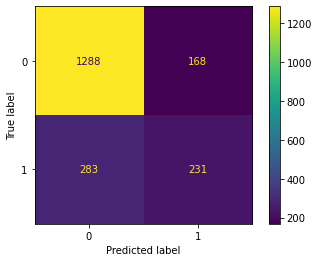

In [17]:
cmx=confusion_matrix(y_test,y_test_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cmx)
disp.plot();

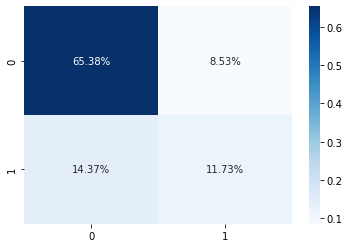

In [18]:
sns.heatmap(cmx/np.sum(cmx), annot=True, fmt='.2%',cmap='Blues');

In [19]:
def yes_no_to_0_1(x):
    if 'Yes' in x:
        return 1
    else: 
        return 0

y_test_roc = y_test.apply(yes_no_to_0_1)
y_pred_probs=lr_model.predict_proba(X_test)[::,1]

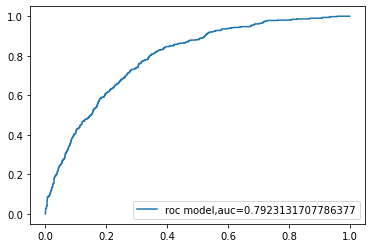

In [20]:
fpr,tpr, _ = roc_curve(y_test_roc,y_pred_probs)
auc=roc_auc_score(y_test_roc,y_pred_probs)
plt.plot(fpr,tpr,label='roc model,auc='+str(auc))
plt.legend(loc=4)
plt.show();

# Even a simple model will give us more than 70% accuracy. Why?

In [21]:
accuracy_score(y_test, y_test_pred)

0.7710659898477157

In [22]:
#What if you decide to just predict everything as true
(1288+168)/1970

0.7390862944162436

In [23]:
#Because precision is not a good method to know if our model is good
#As you can see from this example, our model is only 4% better than using no model at all.

# Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [24]:
sampler_smote = SMOTE()
X_smote,y_smote = sampler_smote.fit_resample(X,y)

In [25]:
X_train_smote,X_test_smote,y_train_smote,y_test_smote=train_test_split(X_smote,y_smote,test_size=0.30,random_state=40)

In [26]:
lr_model_smote=LogisticRegression(max_iter=500)
lr_model_smote.fit(X_train_smote,y_train_smote)

y_test_pred_smote=lr_model_smote.predict(X_test_smote)
accuracy_score(y_test_smote, y_test_pred_smote)

0.7177083333333333

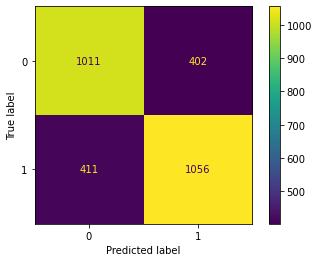

In [27]:
cmx=confusion_matrix(y_test_smote,y_test_pred_smote)
disp=ConfusionMatrixDisplay(confusion_matrix=cmx)
disp.plot();

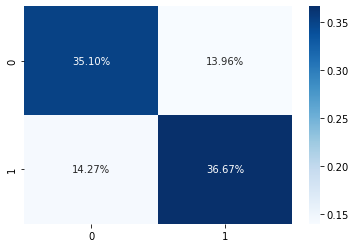

In [28]:
sns.heatmap(cmx/np.sum(cmx), annot=True, fmt='.2%',cmap='Blues');

In [29]:
def yes_no_to_0_1(x):
    if 'Yes' in x:
        return 1
    else: 
        return 0

y_test_smote = y_test_smote.apply(yes_no_to_0_1)
y_pred_probs_smote=lr_model.predict_proba(X_test_smote)[::,1]

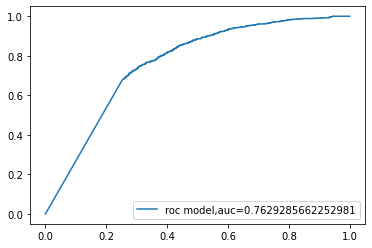

In [30]:
fpr,tpr, _ = roc_curve(y_test_smote,y_pred_probs_smote)
auc=roc_auc_score(y_test_smote,y_pred_probs_smote)
plt.plot(fpr,tpr,label='roc model,auc='+str(auc))
plt.legend(loc=4)
plt.show();

# Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [31]:
sampler_tomek = TomekLinks()
X_tomek,y_tomek = sampler_tomek.fit_resample(X,y)

In [32]:
X_train_tomek,X_test_tomek,y_train_tomek,y_test_tomek=train_test_split(X_tomek,y_tomek,test_size=0.30,random_state=40)

In [33]:
lr_model_tomek=LogisticRegression(max_iter=500)
lr_model_tomek.fit(X_train_tomek,y_train_tomek)

y_test_pred_tomek=lr_model_tomek.predict(X_test_tomek)
accuracy_score(y_test_tomek, y_test_pred_tomek)

0.7797260273972603

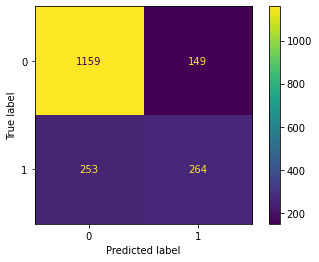

In [34]:
cmx=confusion_matrix(y_test_tomek,y_test_pred_tomek)
disp=ConfusionMatrixDisplay(confusion_matrix=cmx)
disp.plot();

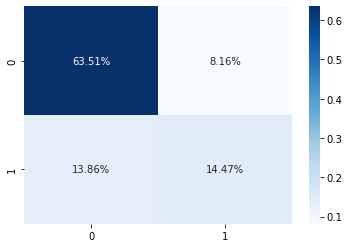

In [35]:
sns.heatmap(cmx/np.sum(cmx), annot=True, fmt='.2%',cmap='Blues');

In [36]:
def yes_no_to_0_1(x):
    if 'Yes' in x:
        return 1
    else: 
        return 0

y_test_tomek = y_test_tomek.apply(yes_no_to_0_1)
y_pred_probs_tomek=lr_model.predict_proba(X_test_tomek)[::,1]

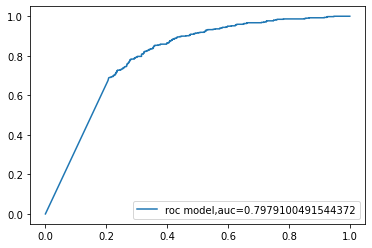

In [37]:
fpr,tpr, _ = roc_curve(y_test_tomek,y_pred_probs_tomek)
auc=roc_auc_score(y_test_tomek,y_pred_probs_tomek)
plt.plot(fpr,tpr,label='roc model,auc='+str(auc))
plt.legend(loc=4)
plt.show();